In [ ]:
! pip install apyori
! pip install apriori_python
! pip install apriori
! pip install efficient_apriori
! pip install fpgrowth_py

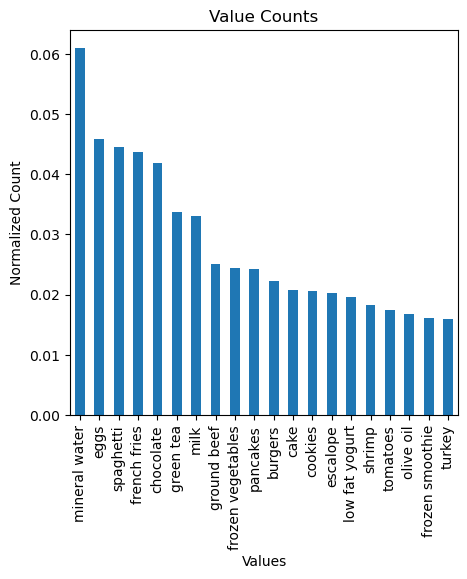

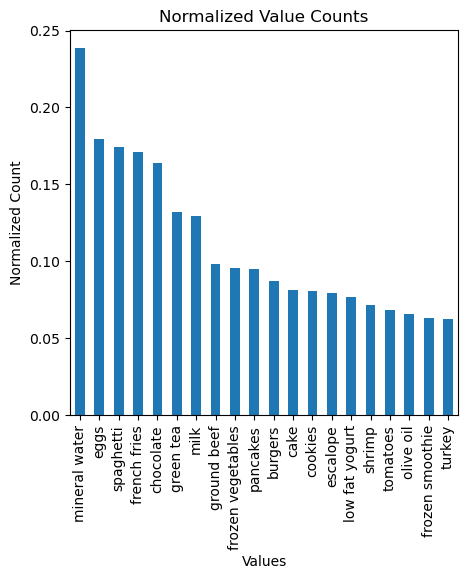

Apriori с использованием apriori_python
[[{'mineral water'}, {'milk'}, 0.20134228187919462], [{'mineral water'}, {'eggs'}, 0.21364653243847875], [{'mineral water'}, {'chocolate'}, 0.220917225950783], [{'mineral water'}, {'spaghetti'}, 0.2505592841163311], [{'eggs'}, {'mineral water'}, 0.28338278931750743], [{'chocolate'}, {'mineral water'}, 0.3213995117982099], [{'spaghetti'}, {'mineral water'}, 0.3430321592649311], [{'milk'}, {'mineral water'}, 0.37037037037037035], [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]
Apriori с использованием apyori
frozenset({'chocolate'}) frozenset({'mineral water'})
Supprot: 0.05265964538061592; Confidence: 0.3213995117982099; Lift: 1.3483320682317521;

frozenset({'mineral water'}) frozenset({'chocolate'})
Supprot: 0.05265964538061592; Confidence: 0.220917225950783; Lift: 1.348332068231752;

frozenset({'eggs'}) frozenset({'mineral water'})
Supprot: 0.05092654312758299; Confidence: 0.28338278931750743; Lift: 1.188844688294532;

frozenset({'min

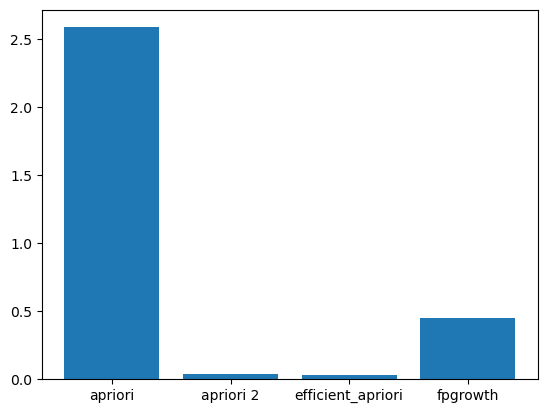

In [2]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from apriori_python import apriori as apriori_py
from apyori import apriori as apyori_py
from efficient_apriori import apriori as apriori_eff
from fpgrowth_py import fpgrowth

# Загрузка данных
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
df = pd.DataFrame(data)
# Визуализация данных
relative_frequency = data.stack().value_counts(normalize=True).nlargest(20)
plt.figure(figsize=(5, 5))
relative_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Value Counts')
plt.show()

actual_frequency = data.stack().value_counts().apply(lambda item: item / data.shape[0]).nlargest(20)
plt.figure(figsize=(5, 5))  # Adjust the width and height as needed
actual_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Normalized Value Counts')
plt.show()


transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)
transactions[0]
# Apriori с использованием apriori_python
t=[]
start=time.perf_counter()
t1, rules= apriori_py(transactions,minSup = 0.04, minConf = 0.2)
time1=(time.perf_counter()-start)
t.append(time1)
print("Apriori с использованием apriori_python")
print(rules)

# Apriori с использованием apyori
start=time.perf_counter()
rules2 = apyori_py(transactions=transactions,
                 min_support=0.04, # как часто элемент(ы) встречаются в наборе данных
                 min_confidence=0.2, #как часто правило будет срабатывать
                 min_lift=1.0001) # насколько лучше по сравнению с чистой случайностью

results = list(rules2)
time2=(time.perf_counter()-start)
t.append(time2)
print("Apriori с использованием apyori")
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Supprot: {0}; Confidence: {1}; Lift: {2};".format(result[1],subset[2],subset[3]))
        print()

# Apriori с использованием efficient_apriori
print("Apriori с использованием efficient_apriori")
start=time.perf_counter()
itemsets, rules3 = apriori_eff(transactions, min_support=0.04, min_confidence=0.2)
time3=(time.perf_counter()-start)
t.append(time3)
for i in range(len(rules3)):
    print(rules3[i])
    
# FP-Growth с использованием fpgrowth_py
print("FP-Growth с использованием fpgrowth_py")
start=time.perf_counter()
itemsets, rules4 = fpgrowth(transactions, minSupRatio=0.04, minConf=0.2)
time4=(time.perf_counter()-start)
t.append(time4)
for i in range(len(rules4)):
    print(rules4[i])
    
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'],t)
plt.show()

In [ ]:
min_support = 0.03
min_confidence = 0.2

apriori_results_py = list(apriori_py(data.values.tolist(), minSup=min_support, minConf=min_confidence))

print("Apriori с использованием apriori_python:")
for result in apriori_results_py[:10]:
    print(result)

# Apriori с использованием apyori
apriori_results_apy = list(apyori_py(data.values.tolist(), minSup=min_support, minConf=min_confidence))

print("\nApriori с использованием apyori:")
for result in apriori_results_apy[:10]:
    print(result)

# Apriori с использованием efficient_apriori
apriori_results_eff = list(apriori_eff(data.values.tolist(), minSup=min_support, minConf=min_confidence))

print("\nApriori с использованием efficient_apriori:")
for result in apriori_results_eff[:10]:
    print(result)

# FP-Growth с использованием fpgrowth_py
min_support_fp = min_support*len(data)

fp_results = fpgrowth(data.values.tolist(), minSupRatio=min_support_fp, k=10)

print("\nFP-Growth с использованием fpgrowth_py:")
for result in fp_results:
    print(result

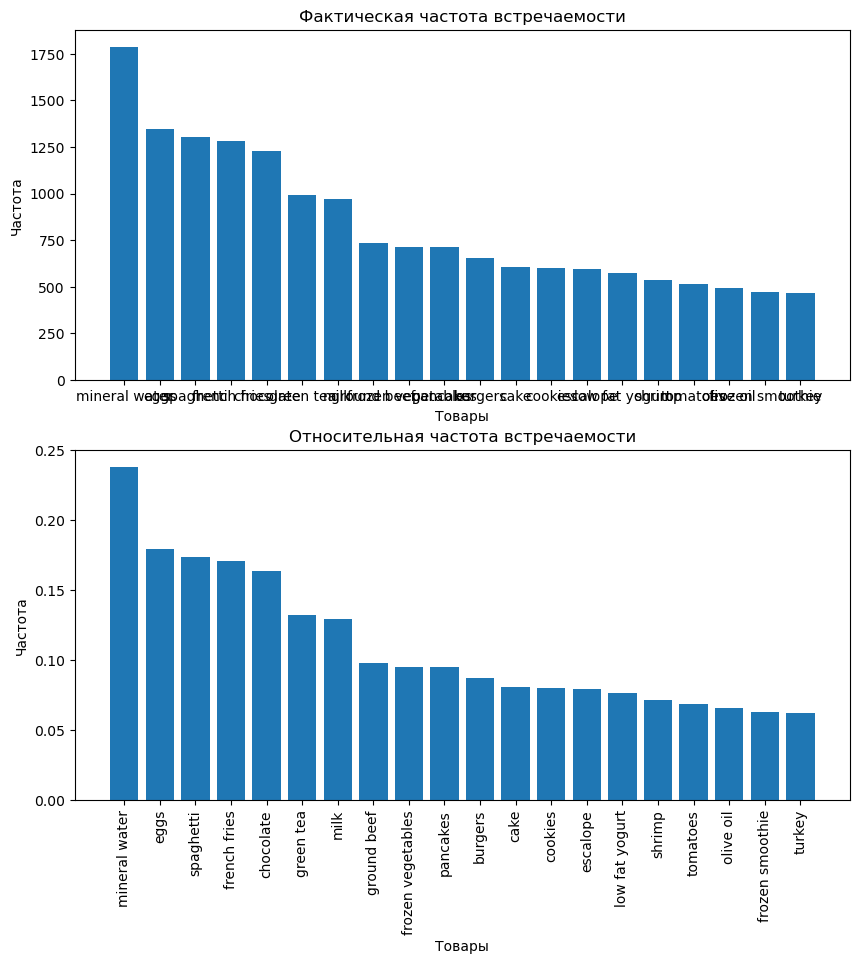

TypeError: apriori() got an unexpected keyword argument 'max_length'

In [18]:
!pip install apriori-python
!pip install apyori
!pip install efficient-apriori
!pip install fpgrowth_py

import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori
from apyori import apriori as apyori_apriori
from efficient_apriori import apriori as efficient_apriori_apriori
import fpgrowth_py as fptree


# Загрузка данных
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

# Визуализация данных
top_20_items = data.stack().value_counts().head(20)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].bar(top_20_items.index, top_20_items.values)
ax[0].set_title('Фактическая частота встречаемости')
ax[0].set_xlabel('Товары')
ax[0].set_ylabel('Частота')

relative_frequency = top_20_items / data.shape[0]
ax[1].bar(relative_frequency.index, relative_frequency.values)
ax[1].set_title('Относительная частота встречаемости')
ax[1].set_xlabel('Товары')
ax[1].set_ylabel('Частота')
plt.xticks(rotation=90)
plt.show()


# Apriori с использованием apriori_python
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])

result = apriori(transactions, minSup=0.001, minConf=0.8, max_length=4)
rules = list(result)
top_10_apriori_python = sorted(rules, key=lambda x: x.lift, reverse=True)[:10]
print(top_10_apriori_python)


# Apriori с использованием apyori
rules = apyori_apriori(transactions, min_support=0.001, min_confidence=0.8, max_length=4)
top_10_apyori = sorted(rules, key=lambda x: x.ordered_statistics[0].lift, reverse=True)[:10]
print(top_10_apyori)


# Apriori с использованием efficient_apriori
itemsets, rules = efficient_apriori_apriori(transactions, min_support=0.001, min_confidence=0.8, max_length=4)
top_10_efficient_apriori = sorted(rules, key=lambda x: x.lift, reverse=True)[:10]
print(top_10_efficient_apriori)


# FP-Growth с использованием fpgrowth_py
itemsets = fptree.find_frequent_itemsets(transactions, 0.001 * len(transactions))
rules = fptree.generate_association_rules(itemsets, 0.8)
top_10_fpgrowth_py = sorted(rules, key=lambda x: x[4], reverse=True)[:10]
print(top_10_fpgrowth_py)


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from apriori_python import apriori as apriori_py
from apyori import apriori as apyori_py
from efficient_apriori import apriori as apriori_eff
from fpgrowth_py import fpgrowth

# Загрузка данных
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

# Визуализация данных
item_counts = data.apply(pd.value_counts).sum(axis=1)
top_20_items = item_counts.nlargest(20)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_20_items.plot(kind='bar', title='Фактическая частота встречаемости')
plt.xlabel('Товары')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
top_20_items.plot(kind='bar', log=True, title='Относительная частота встречаемости')
plt.xlabel('Товары')
plt.ylabel('Количество (логарифмическая шкала)')

plt.tight_layout()
plt.show()

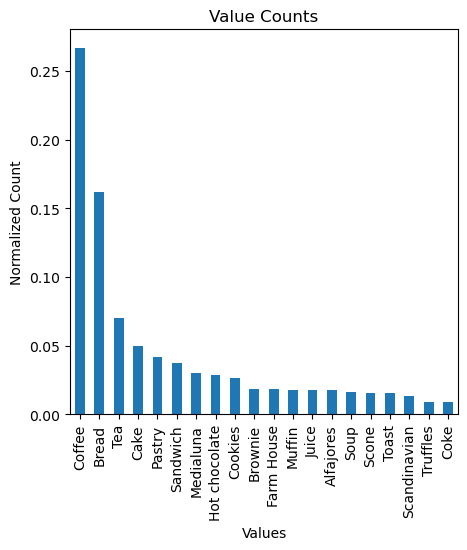

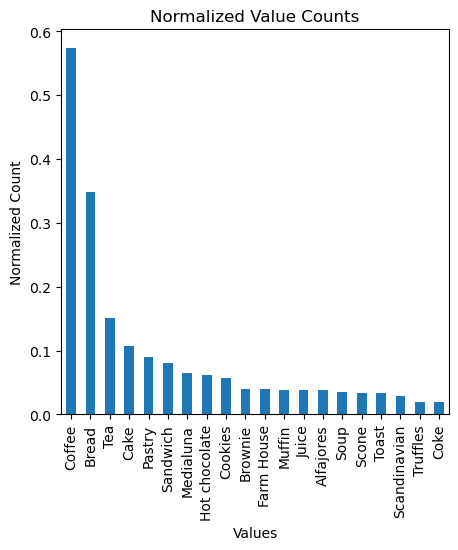

Apriori с использованием apriori_python
Apriori с использованием apyori
frozenset({'Pastry'}) frozenset({'Bread'})
Supprot: 0.02895813660686182; Confidence: 0.3386503067484663; Lift: 1.0421944054309438;

frozenset({'Cake'}) frozenset({'Coffee'})
Supprot: 0.054348966530269646; Confidence: 0.5269582909460834; Lift: 1.1091959962471556;

frozenset({'Cookies'}) frozenset({'Coffee'})
Supprot: 0.028013849543594586; Confidence: 0.5184466019417476; Lift: 1.0912797180006175;

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Supprot: 0.029377819746091702; Confidence: 0.5072463768115942; Lift: 1.067704332462744;

frozenset({'Juice'}) frozenset({'Coffee'})
Supprot: 0.02045955303745672; Confidence: 0.5342465753424658; Lift: 1.124537126676025;

frozenset({'Medialuna'}) frozenset({'Coffee'})
Supprot: 0.03493862134088763; Confidence: 0.5692307692307691; Lift: 1.1981754552867623;

frozenset({'Pastry'}) frozenset({'Coffee'})
Supprot: 0.047214353163361665; Confidence: 0.5521472392638037; Lift: 1.1622162

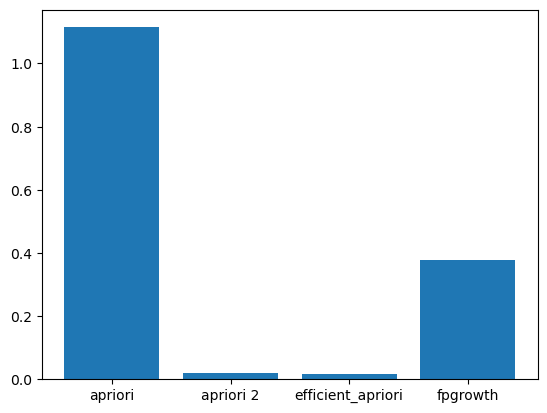

In [3]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from apriori_python import apriori as apriori_py
from apyori import apriori as apyori_py
from efficient_apriori import apriori as apriori_eff
from fpgrowth_py import fpgrowth

# Загрузка данных
data = pd.read_csv('data.csv', header=None)

# Визуализация данных
relative_frequency = data.stack().value_counts(normalize=True).nlargest(20)
plt.figure(figsize=(5, 5))
relative_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Value Counts')

actual_frequency = data.stack().value_counts().apply(lambda item: item / data.shape[0]).nlargest(20)
plt.figure(figsize=(5, 5))  # Adjust the width and height as needed
actual_frequency.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Normalized Value Counts')
plt.show()

df = pd.DataFrame(data)
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)
transactions[0]
# Apriori с использованием apriori_python
t=[]
start=time.perf_counter()
t1, rules= apriori_py(transactions,minSup = 0.02, minConf = 0.3)
time1=(time.perf_counter()-start)
t.append(time1)
print("Apriori с использованием apriori_python")
rules

# Apriori с использованием apyori
start=time.perf_counter()
rules2 = apyori_py(transactions=transactions,
                 min_support=0.02, # как часто элемент(ы) встречаются в наборе данных
                 min_confidence=0.3, #как часто правило будет срабатывать
                 min_lift=1.0001) # насколько лучше по сравнению с чистой случайностью

results = list(rules2)
time2=(time.perf_counter()-start)
t.append(time2)
print("Apriori с использованием apyori")
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Supprot: {0}; Confidence: {1}; Lift: {2};".format(result[1],subset[2],subset[3]))
        print()

# Apriori с использованием efficient_apriori
print("Apriori с использованием efficient_apriori")
start=time.perf_counter()
itemsets, rules3 = apriori_eff(transactions, min_support=0.02, min_confidence=0.3)
time3=(time.perf_counter()-start)
t.append(time3)
for i in range(len(rules3)):
    print(rules3[i])
    
# FP-Growth с использованием fpgrowth_py
print("FP-Growth с использованием fpgrowth_py")
start=time.perf_counter()
itemsets, rules4 = fpgrowth(transactions, minSupRatio=0.03, minConf=0.3)
time4=(time.perf_counter()-start)
t.append(time4)
for i in range(len(rules4)):
    print(rules4[i])
    
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'],t)
plt.show()

In [ ]:
# Apriori с использованием apyori
start=time.perf_counter()
rules2 = apyori_py(transactions=transactions,
                 min_support=0.04, # как часто элемент(ы) встречаются в наборе данных
                 min_confidence=0.2, #как часто правило будет срабатывать
                 min_lift=1.0001) # насколько лучше по сравнению с чистой случайностью

results = list(rules2)
time2=(time.perf_counter()-start)
t.append(time2)
print("Apriori с использованием apyori")
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Supprot: {0}; Confidence: {1}; Lift: {2};".format(result[1],subset[2],subset[3]))
        print()

# Apriori с использованием efficient_apriori
print("Apriori с использованием efficient_apriori")
start=time.perf_counter()
itemsets, rules3 = apriori_eff(transactions, min_support=0.04, min_confidence=0.2)
time3=(time.perf_counter()-start)
t.append(time3)
for i in range(len(rules3)):
    print(rules3[i])
    
# FP-Growth с использованием fpgrowth_py
print("FP-Growth с использованием fpgrowth_py")
start=time.perf_counter()
itemsets, rules4 = fpgrowth(transactions, minSupRatio=0.04, minConf=0.2)
time4=(time.perf_counter()-start)
t.append(time4)
for i in range(len(rules4)):
    print(rules4[i])
    
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'],t)
plt.show()